# **Naive Bayes - Marketing**

## 1. Data Preparation

#### 1.1 Import Library

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#### 1.2 Import Dataset

In [3]:
df = pd.read_csv('marketing.csv')

#### 1.3 Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


*Ternyata kolom Gender bertipe Object, nantinya akan kami ubah tipe datanya ke Float dengan mengganti Male menjadi 0.0, dan Female menjadi 1.0*

#### 1.4 Cek nilai unik gender

In [5]:
print("Gender:",df['Gender'].unique())

Gender: ['Male' 'Female']


*Mengecek nilai unik kolom Gender yang nantinya digunakan untuk mengubah nilainya menjadi float nantinya*

#### 1.4 Encode

In [6]:
df['Gender'] = df['Gender'].map({"Male":0.0, "Female":1.0})

df['Gender']

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
395    1.0
396    0.0
397    1.0
398    0.0
399    1.0
Name: Gender, Length: 400, dtype: float64

*Mengubah tipe data Gender menjadi float dengan menggunakan .map()*

#### 1.5 Menghapus kolom tidak diperlukan

In [7]:
df = df.drop(['User ID'], axis=1)

*'User ID' dihapus karena bakal mengganggu proses modeling*

#### 1.6 Penanganan data kosong dan duplikat

In [8]:
print("Data Kosong  :",df.isnull().sum().sum())
print("Data Duplikat:",df.duplicated().sum())

Data Kosong  : 0
Data Duplikat: 20


In [9]:
df = df.drop_duplicates(keep='first')

*Menghapus semua data duplikat kecuali data pertama*

## 2. Exploratory Data Analyst

#### 2.1 Cek nilai outlier

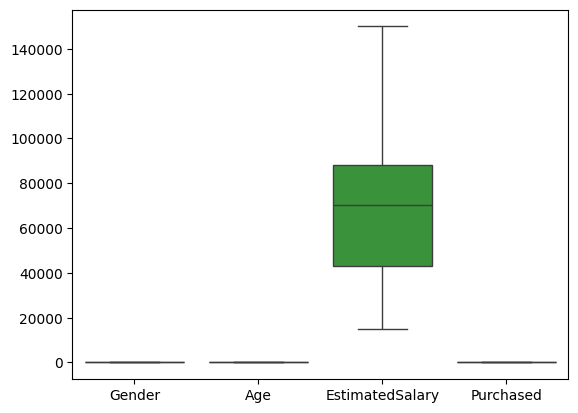

In [10]:
sns.boxplot(df)
plt.show()

*Tidak ada nilai outlier*

#### 2.2 Distribusi target

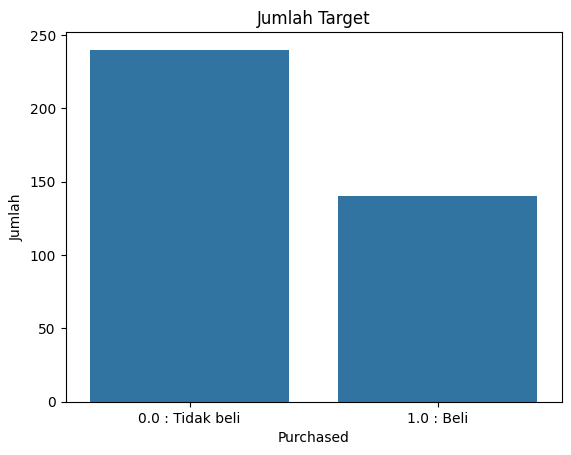

In [11]:
sns.countplot(x='Purchased', data=df)
plt.title('Jumlah Target')
plt.xlabel('Purchased')
plt.ylabel('Jumlah')
plt.xticks([0,1], ['0.0 : Tidak beli', '1.0 : Beli'])
plt.show()

*Banyak yang tidak membeli yang ditunjukan oleh 0.0*

#### 2.3 Presentase target

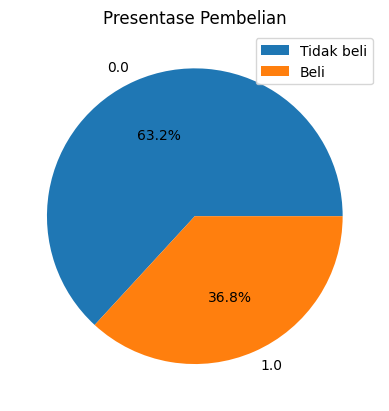

In [12]:
plt.title('Presentase Pembelian')
plt.pie(df['Purchased'].value_counts(), labels=df['Purchased'].value_counts().index, autopct='%1.1f%%')
plt.legend(['Tidak beli', 'Beli'])
plt.show()

*Banyak yang tidak membeli yang ditunjukan oleh 0.0*

#### 2.4 Cek korelasi

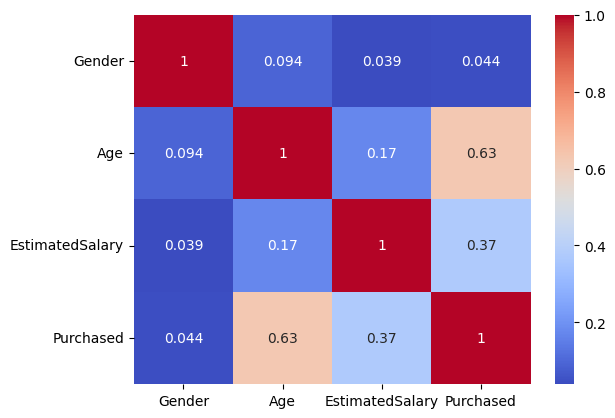

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

*Hanya untuk mengecek saja, tidak akan digunakan dalam model*

## 3. Modeling